In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001083689"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001083689
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,SOUTHCOAST FINANCIAL CORP
Ticker,SOCB


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,11.0,6.214545e+00,4.544967e-01,5.74,5.91,6.1,6.37,7.22
interest income,14.0,4.608286e+06,2.255862e+05,4345000.00,4460500.00,4547000.0,4689250.00,5070000.00
net income,14.0,-4.492857e+04,3.485326e+06,-8128000.00,-308500.00,769000.0,1026250.00,7035000.00
net interest income,14.0,3.406929e+06,3.326121e+05,2812000.00,3250750.00,3416000.0,3593500.00,4015000.00
provision for loan losses,14.0,7.145000e+05,1.299769e+06,-900000.00,0.00,50000.0,975000.00,3400000.00


# Plots

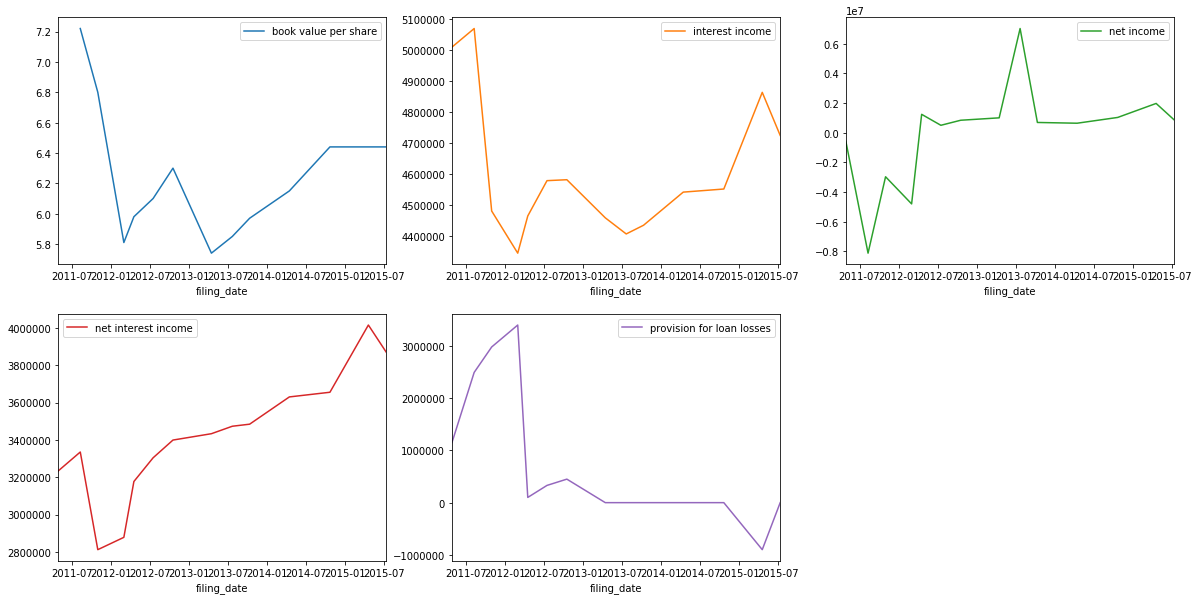

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                              
0001083689 book value per share                            2011Q1  missing   
           book value per share                            2012Q4  missing   
           book value per share                            2013Q4  missing   
           book value per share                            2014Q2  missing   
           book value per share       2014Q4 to 2015Q2: 3 periods  missing   
           interest income                                 2012Q4  missing   
           interest income                                 2013Q4  missing   
           interest income                                 2014Q2  missing   
           interest income                                 2014Q4  missing   
           net income                                      2012Q4  missing   
           net income                                      2013Q4  missing   
           net income                                      2014Q2  missing   
           net income                                      2014Q4  missing   
           net interest income                             2012Q4  missing   
           net interest income                             2013Q4  missing   
           net interest income                             2014Q2  missing   
           net interest income                             2014Q4  missing   
           provision for loan losses                       2012Q4  missing   
           provision for loan losses                       2013Q4  missing   
           provision for loan losses                       2014Q2  missing   
           provision for loan losses                       2014Q4  missing   
           total revenue                                     None    empty   

                                                 message  
cik        item                                           
0001083689 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()